

##NIRMA UNIVERSITY  
####Institute of Technology Department of Computer Science and Engineering





MCA Semester-III  


**Course**: 7CS141 - Data Mining and Visualization  
**Course Coordinator**: Dr. Lata Gohil

**Group**:
- Barad Kamal  (Roll No: 23MCA003)
- Aayush Gajjar (Roll No: 23MCA017)
---

## Project Overview

This project aims for training and testing a Siamese Neural Network (SNN), which is used for tasks like face recognition, where the goal is to determine whether two images are similar or not. The Siamese network architecture works by comparing pairs of images and learning to distinguish whether they belong to the same class or different classes.

---


# Import Libraries

In this section, essential libraries ko import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import cv2
import tensorflow as tf
from pathlib import Path
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from tensorflow.keras.applications import resnet
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Dataset

## Utility Functions

The function `generate_image_pairs` creates pairs of images for training the Siamese neural network. It generates both positive pairs (images of the same class) and negative pairs (images of different classes)

In [24]:
# Function to generate image pairs
def generate_image_pairs(images, labels):
    # Generate index for each label
    unique_labels = np.unique(labels)
    label_wise_indices = dict()
    for label in unique_labels:
        label_wise_indices.setdefault(label,
                                      [index for index, curr_label in enumerate(labels) if
                                       label == curr_label])
    print(label_wise_indices)
    # Generate image pairs and labels
    pair_images = []
    pair_labels = []
    for index, image in enumerate(images):
        pos_indices = label_wise_indices.get(labels[index])
        pos_image = images[np.random.choice(pos_indices)]
        pair_images.append((image, pos_image))
        pair_labels.append(1)

        if index==0:
          print(pos_indices)
          print(len(pos_image))
          print(len(pair_images))
          print(pair_labels)

        neg_indices = np.where(labels != labels[index])
        neg_image = images[np.random.choice(neg_indices[0])]
        pair_images.append((image, neg_image))
        pair_labels.append(0)

    return np.array(pair_images), np.array(pair_labels)

## Prepare Data

processes the dataset of face images and their corresponding labels for training.

Olivetti face dataset ko load karne ke liye

In [17]:
# Get the data directory paths
faces = '/content/olivetti_faces.npy'
faces_targets = '/content/olivetti_faces_target.npy'

In [18]:
# Load the images and labels
face_images = np.load(faces)
face_labels = np.load(faces_targets)

In [11]:
face_images

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [12]:
face_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [8]:
type(face_images)
type(face_labels)

numpy.ndarray

In [13]:
face_images.shape

(400, 64, 64)

In [14]:
face_labels.shape

(400,)

In [10]:
target_shape = face_images[0].shape
target_shape

(64, 64)

In [43]:
images_dataset, labels_dataset = generate_image_pairs(face_images, face_labels)
images_dataset, labels_dataset = shuffle(images_dataset, labels_dataset)

{0: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 1: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 2: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 3: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 4: [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 5: [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], 6: [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], 7: [70, 71, 72, 73, 74, 75, 76, 77, 78, 79], 8: [80, 81, 82, 83, 84, 85, 86, 87, 88, 89], 9: [90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 10: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109], 11: [110, 111, 112, 113, 114, 115, 116, 117, 118, 119], 12: [120, 121, 122, 123, 124, 125, 126, 127, 128, 129], 13: [130, 131, 132, 133, 134, 135, 136, 137, 138, 139], 14: [140, 141, 142, 143, 144, 145, 146, 147, 148, 149], 15: [150, 151, 152, 153, 154, 155, 156, 157, 158, 159], 16: [160, 161, 162, 163, 164, 165, 166, 167, 168, 169], 17: [170, 171, 172, 173, 174, 175, 176, 177, 178, 179], 18: [180, 181, 182, 183, 184, 185, 186, 187, 188, 189], 19: [190, 191, 192, 193, 194, 195, 196, 197, 198, 199],

## Visualize

 image pairs ko visualize and positive aur negative dono types ke image examples ko visualize



In [ ]:
def visualize(image_pairs, labels, n = 5, title = "Image Pair Examples"):
    """ Visualize a few pairs """

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))
    plt.title(title)
    axs = fig.subplots(n, 2)
    for i in range(n):
        show(axs[i, 0], image_pairs[i][0])
        show(axs[i, 1], image_pairs[i][1])

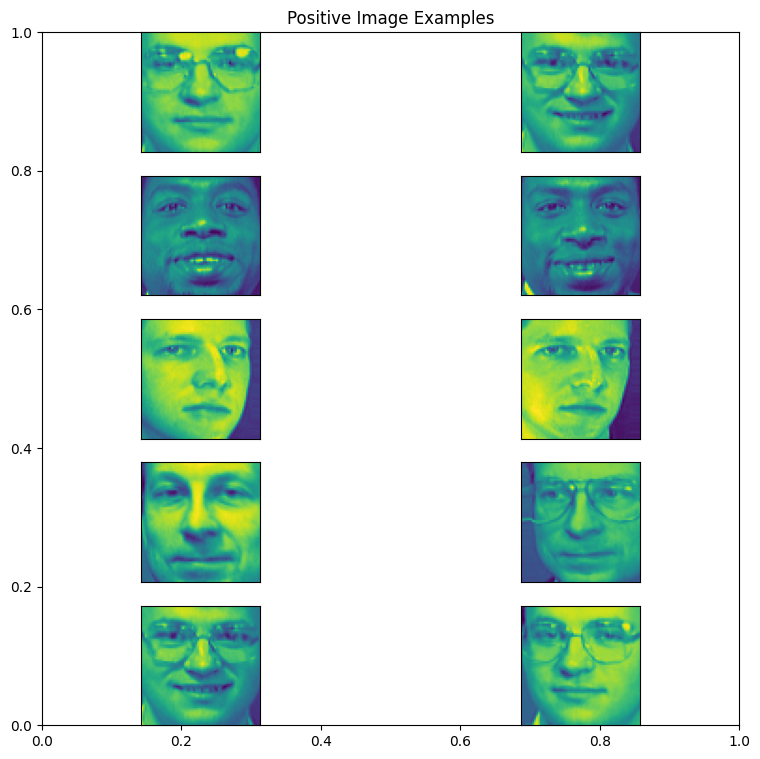

In [ ]:
# Visualize Positive Images
n = 5
indices = np.where(labels_dataset == 1)[:n]
visualize(images_dataset[indices], labels_dataset[indices],
          title = "Positive Image Examples")

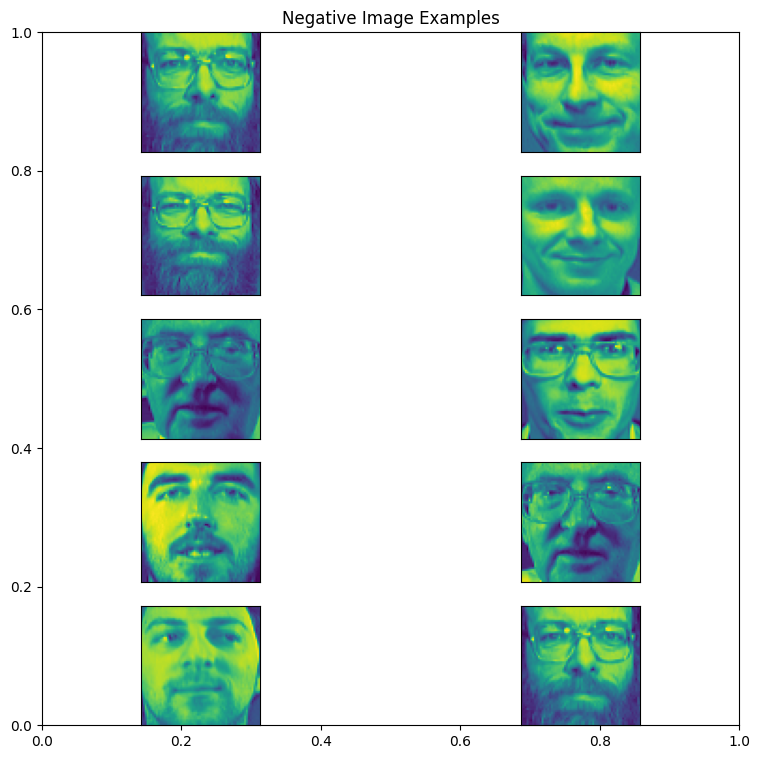

In [ ]:
# Visualize Negative Images
n = 5
indices = np.where(labels_dataset == 0)[:n]
visualize(images_dataset[indices], labels_dataset[indices],
          title = "Negative Image Examples")

# Network Architecture

## Embedding Layer

convolutional neural network (CNN) model using Keras to generate embeddings from grayscale images of size 64x64 pixels. The architecture consists of multiple convolutional layers, pooling layers, dropout layers, and fully connected layers, designed to extract features and represent images in a lower-dimensional space.




In [ ]:
inputs = layers.Input((64, 64, 1))

x = layers.Conv2D(64, (10, 10), padding="same", activation="relu")(inputs)

# Feature Map Size = [X.size - Kernel.size]+1 // Stride = 1
# Feature Map Size = [X.size - Kernel.size]/2 // Stride = 2

x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (7, 7), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (4, 4), padding="same", activation="relu")(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(256, (4, 4), padding="same", activation="relu")(x)
fcOutput = layers.Flatten()(x)
fcOutput = layers.Dense(4096, activation = "relu")(fcOutput)
outputs = layers.Dense(1024, activation = "sigmoid")(fcOutput)

embedding = Model(inputs, outputs, name = "Embedding")

## Siamese Network

custom loss function called **Contrastive Loss** and a **Distance Layer** for a neural network model, typically used in tasks like image similarity, face recognition, or any scenario where the goal is to learn embeddings that can distinguish between similar and dissimilar pairs.

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
# Define the Contrastive Loss
def contrastive_loss(y, preds, margin=1):

# Ensures that y is of the same data type as preds
    y = tf.cast(y, preds.dtype)
    squaredPreds = K.square(preds)

# Ensures that the margin for dissimilar pairs doesn't go negative, pushing dissimilar embeddings apart only
# if they are within the margin

    squaredMargin = K.square(K.maximum(margin - preds, 0))
    loss = K.mean(y * squaredPreds + (1 - y) * squaredMargin)

    return loss

In [ ]:
# Distance Layer
class DistanceLayer(layers.Layer):
    """
    This layer is responsible for computing the distance
    between the embeddings
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, compare):
        sum_squared = K.sum(K.square(anchor - compare), axis=1, keepdims=True)
        return K.sqrt(K.maximum(sum_squared, K.epsilon()))

In [ ]:
anchor_input = layers.Input(name="anchor", shape=target_shape + (1,))
compare_input = layers.Input(name="compare", shape=target_shape + (1,))

distances = DistanceLayer()(
    embedding(anchor_input),
    embedding(compare_input),
)

outputs = layers.Dense(1, activation = "sigmoid") (distances)

siamese_model = Model(
    inputs=[anchor_input, compare_input], outputs=outputs
)

# Training
train the previously defined **Siamese Neural Network** using Keras.
model is for binary classification tasks, where it predicts whether two input images are similar or not.

In [ ]:
siamese_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = siamese_model.fit([images_dataset[:, 0, :], images_dataset[:, 1, :]], labels_dataset,
                            epochs=150, validation_split = 0.2, batch_size = 64)

Epoch 1/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 481ms/step - accuracy: 0.4807 - loss: 0.6967 - val_accuracy: 0.5437 - val_loss: 0.6389
Epoch 2/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.4875 - loss: 0.6568 - val_accuracy: 0.5500 - val_loss: 0.6127
Epoch 3/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.4780 - loss: 0.6409 - val_accuracy: 0.5500 - val_loss: 0.6024
Epoch 4/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.5005 - loss: 0.6076 - val_accuracy: 0.5625 - val_loss: 0.5985
Epoch 5/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.5106 - loss: 0.6182 - val_accuracy: 0.5688 - val_loss: 0.6056
Epoch 6/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.4764 - loss: 0.6272 - val_accuracy: 0.5562 - val_loss: 0.5950
Epoch 7/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.5405 - loss: 0.5865 - val_accuracy: 0.6500 - val_loss: 0.6236
Epoch 8/150
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.5684 - loss: 0.6317 - val_acc

plotting the loss and accuracy metrics over the epochs.

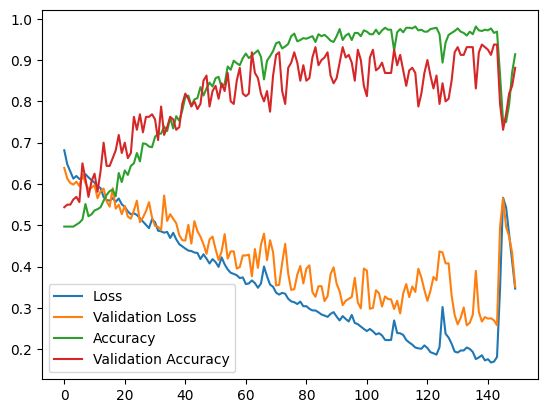

In [ ]:
# Training Plot
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Loss", "Validation Loss", "Accuracy", "Validation Accuracy"])
plt.show()

# Testing

`test_visualize` function is designed to display a set of images in a grid format using Matplotlib. This can be particularly useful for visually inspecting the input images used in training or testing a model.

In [ ]:
def test_visualize(images, n = 5):
    """ Visualize a few images """

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))
    axs = fig.subplots(1, n)
    for i in range(n):
        show(axs[i], images[i])

## Test 1
 Defined test indices and selected a random test image.
 Then, 5 random compare images are selected from different index ranges.


In [ ]:
test_indices = [0, 1, 2, 3, 4]
test_index = random.sample(range(10), 1)[0]
test_image = face_images[test_index]

compare_images = []
for i in range(5):
    index = random.sample(range(i * 10, (i + 1) * 10), 1)[0]
    image = face_images[index]
    compare_images.append(image)

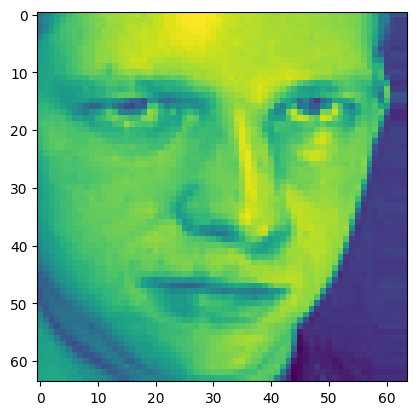

In [ ]:
plt.imshow(test_image)

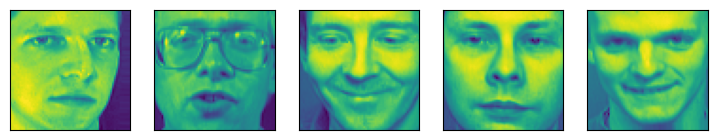

In [ ]:
test_visualize(compare_images)

In [ ]:
image_pairs = []

for image in compare_images:
    image_pairs.append((test_image, image))

image_pairs = np.array(image_pairs)

In [ ]:
score = siamese_model.predict([image_pairs[:, 0, :], image_pairs[:, 1, :]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [ ]:
print(score)

[[0.7083986 ]
 [0.55396   ]
 [0.0946817 ]
 [0.18120027]
 [0.1687331 ]]


## Test 2

In [ ]:
test_indices = [0, 1, 2, 3, 4]
test_index = random.sample(range(10, 20), 1)[0]
test_image = face_images[test_index]

compare_images = []
for i in range(5):
    index = random.sample(range(i * 10, (i + 1) * 10), 1)[0]
    image = face_images[index]
    compare_images.append(image)

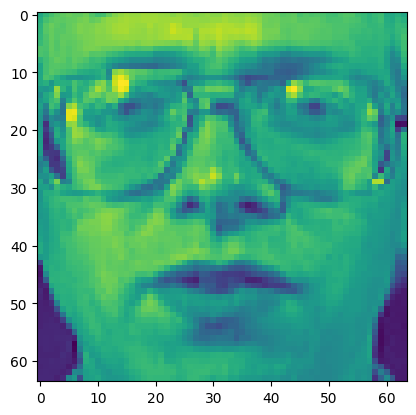

In [ ]:
plt.imshow(test_image)

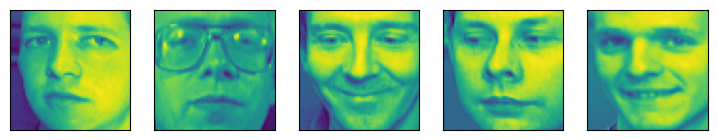

In [ ]:
test_visualize(compare_images)

In [ ]:
image_pairs = []

for image in compare_images:
    image_pairs.append((test_image, image))

image_pairs = np.array(image_pairs)

In [ ]:
score = siamese_model.predict([image_pairs[:, 0, :], image_pairs[:, 1, :]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
print(score)

[[0.57337767]
 [0.65996146]
 [0.1317381 ]
 [0.16977675]
 [0.25263044]]
